# **Holiday Package Data Analysis**

## Objectives for Data Analysis

- **Segment Customers for Targeted Marketing:** Identify high-potential customer groups for tailored marketing strategies.
- **Determine Effective Marketing Channels:** Analyze channels that maximize conversions and minimize costs.
- **Identify Key Drivers of Package Purchases:** Understand factors influencing customer purchasing decisions.
- **Analyze Purchasing Behavior Trends:** Identify seasonal trends to optimize campaign timing.
- **Predict Potential Buyers for New Packages:** Use predictive models to identify likely buyers for the Wellness Tourism Package.
- **Optimize Marketing Budget Allocation:** Allocate budget more efficiently based on data-driven insights for highr ROI.

### **Data Collection**

The Dataset is collected from [Holiday Package Prediction](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction)
- includes 20 column and 4888 rows in Total.

## Business Questions

1. **How can we identify and address the key factors influencing the low purchase rate among customers, and what strategies can be implemented to convert the non-purchasing customers into buyers, thereby improving overall sales and enhancing marketing effectiveness?**
2. **Which gender is more likely to purchase the product, and how does this information impact targeted marketing strategies?**
3. **How does the age category influence customer purchasing behavior, and which age group should be targeted to maximize the uptake of our product offerings?**
4. **How does the duration of the sales pitch affect product purchases, and can adjusting it increase sales?**
5. **What are the typical compositions of groups that make purchases (e.g., friends, family, colleagues)?**
6. **What is the conversion rate of packages that were pitched versus those that were purchased?**
7. **How does the preference for 3 Rating Accomodation is prefered over 5 & 4 Accomodation rating impact the package purchase rates across different property star ratings?**

## **Pre Data Exploration**

- Very initial stage in the Exploration involves fetching the essential libraries then reading the file.
- The next phase involves examining the Data using the df.head() which allows to view first 5 results from top and df.tail() shows last 5 results. However you can put any number in parenthesis to view as per your choice
- Lately in the next step we can view summary statistics of the dataset numeric values including count, mean, standard deviation, minimum,  percentile, and maximum with df.describe().
- And lastly for overall structure, datatypes and missing values we can see with df.info().

**Fetching Libraries and loading dataset**

In [2]:
#importing Pandas for manipulating data 
import pandas as pd #for handling Dataframe
#numpy for handling arrays 
import numpy as np #for Numerical operation

#visualization
import matplotlib.pyplot as plt #Matplotlib is called for Plots and Visualization
import seaborn as sns
import plotly.express as px #for Interative Visualization

import warnings #for cleaner output

warnings.filterwarnings("ignore")

%matplotlib inline

**Reading CSV**

In [3]:
#for reading file
travel_data = pd.read_csv("D:\\Travel.csv")

In [6]:
#Top 10 Records
travel_data.head(10)# else we can use travel_data.iloc[:10] Both are accepatble

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [8]:
travel_data.tail() #we can fetch data from bottom

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [10]:
# Understanding the structure of data we are using df.Shape function or 
#we can use len(df.columns) for columns, Here we have 4888 rows and 20 columns
travel_data.shape

(4888, 20)

In [12]:
# Summary of the dataset is to find mean, median, outliers and std deviation
travel_data.describe() # we can fetch the required details with diferent code or can get all in one place

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [14]:
#checking values
travel_data.info() #is use toCheck Datatypes in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

`from above data, we can observe mix of integer datatypes:- 7 integer, 7 float, 6 object, Some missing value present which we will inspect`

## **EXPLORING DATA**

In [28]:
# Defining Features based on their datatypes
numerical_features=[column for column in travel_data.columns if travel_data[column].dtype != 'object']
categorical_features=[column for column in travel_data.columns if travel_data[column].dtype == 'object']

#Display the numerical and categorical feature
print(f'The dataset contains{len(numerical_features)} numerical features: {numerical_features}')
print(f'The dataset contains{len(categorical_features)} Categorical features: {categorical_features}')

The dataset contains14 numerical features: ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
The dataset contains6 Categorical features: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


## Feature Information based on Our inspection

- **Type**: How the customer engagement (Company Initiated or Self-enquiry)
- **CityTier**: Urban Classification based on development level, population size, amenities and quality of life standards
- **DurationOfPitch**: Length of the time spend by a salesperson to the customer.
- **CountofFollowups**: Total number of Interactions between salesperson and Customer after the initial sales pitch.
- **ProductPitched**: Product promoted by the salesperson.
- **Passport**: Customer passport status (0: No, 1: Yes).
- **NumberOfTrips**: Average number of trips made by the customer in a year.
- **PreferredPropertyStar**: Preferred Property rating by the customer.

### Uni or One Variable 

- This Analysis helps identify potential Outliers, distribution shape. For Numerical features this add summary Statistics and visualizing distributions using histograms, box plots, and density plots. applying this to understand the distribution, central tendency, mean, median, mode. IQR and dispersion of single feature. It comes in Exploratory Data Analysis.

### Visualization of Numerical Features

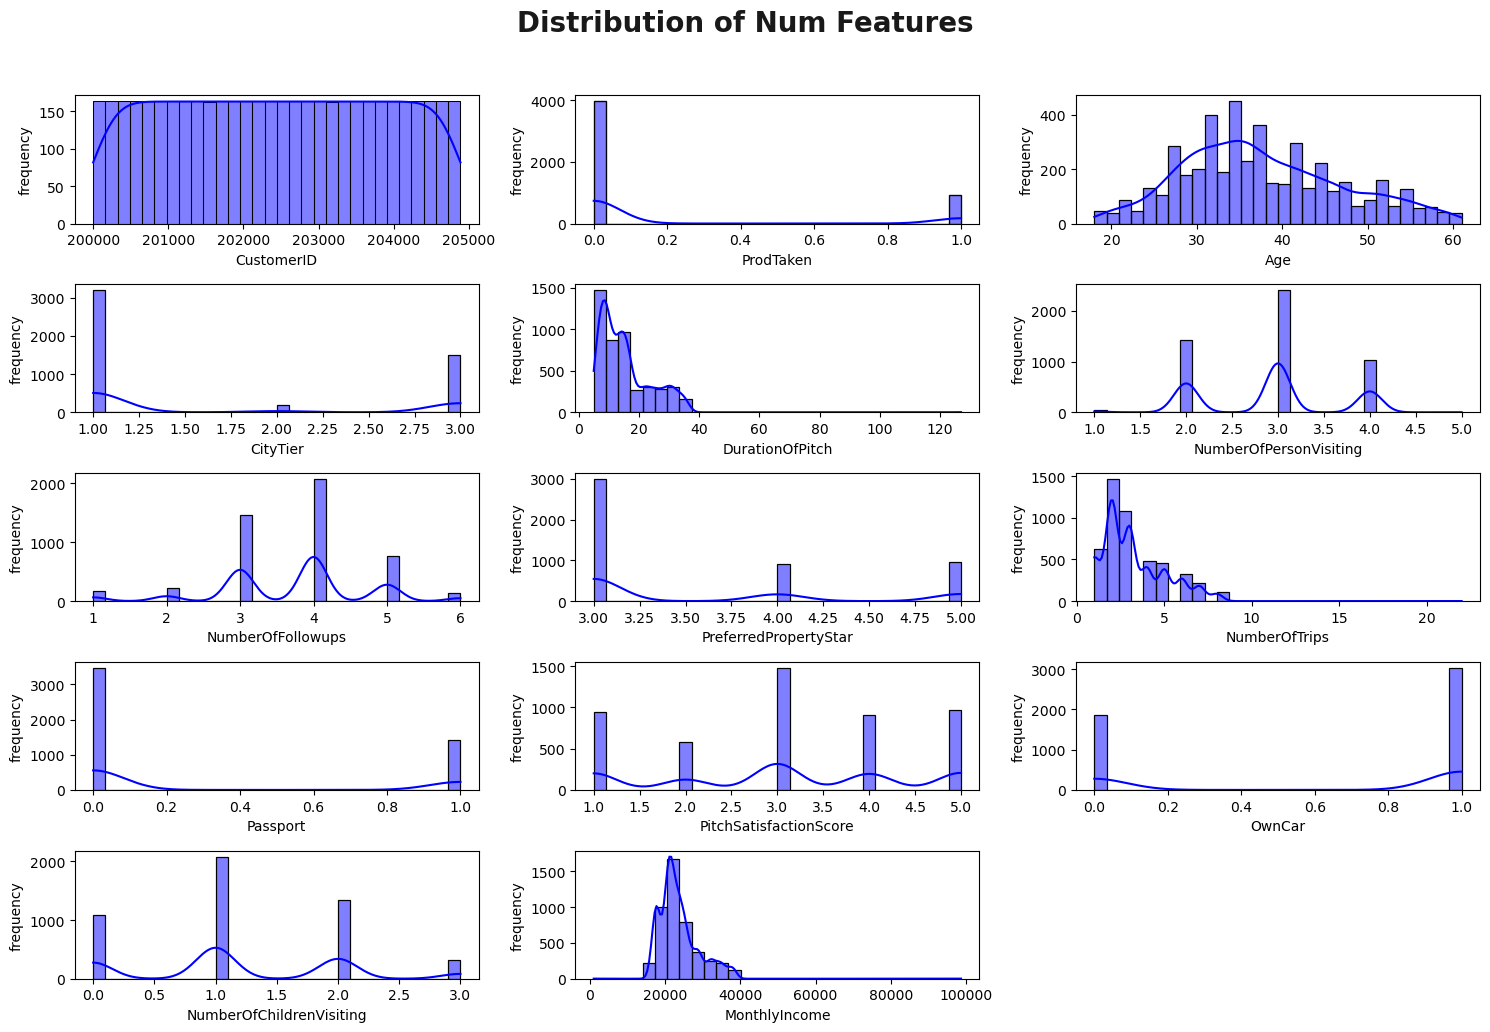

In [32]:
## code snippet creates a series of kernel density estimate (KDE) plots for numerical features in a dataset.
#i am takinf distribution in place of Univariate to avoid plag
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Num Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.,va='bottom')

for index in range(0, len(numerical_features)):
    plt.subplot(5, 3, index+1)
    sns.histplot(travel_data[numerical_features[index]], color='blue', kde=True, bins=30)
    plt.xlabel(numerical_features[index])
    plt.ylabel('frequency')
    plt.tight_layout()

In [34]:
# Data type conversion for preventing original
## creating copy of travel_data will help in preprocessing
travel_data_types_converted = travel_data.copy()
travel_data_types_converted[['ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']] = travel_data_types_converted[['ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']].astype('object')

In [22]:
# verifying the Data Conversion were successful or not
travel_data_types_converted.info() #checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   object 
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   object 
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   object 
 9   NumberOfFollowups         4843 non-null   object 
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   object 
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   object 
 14  Passport

### Categorical Features

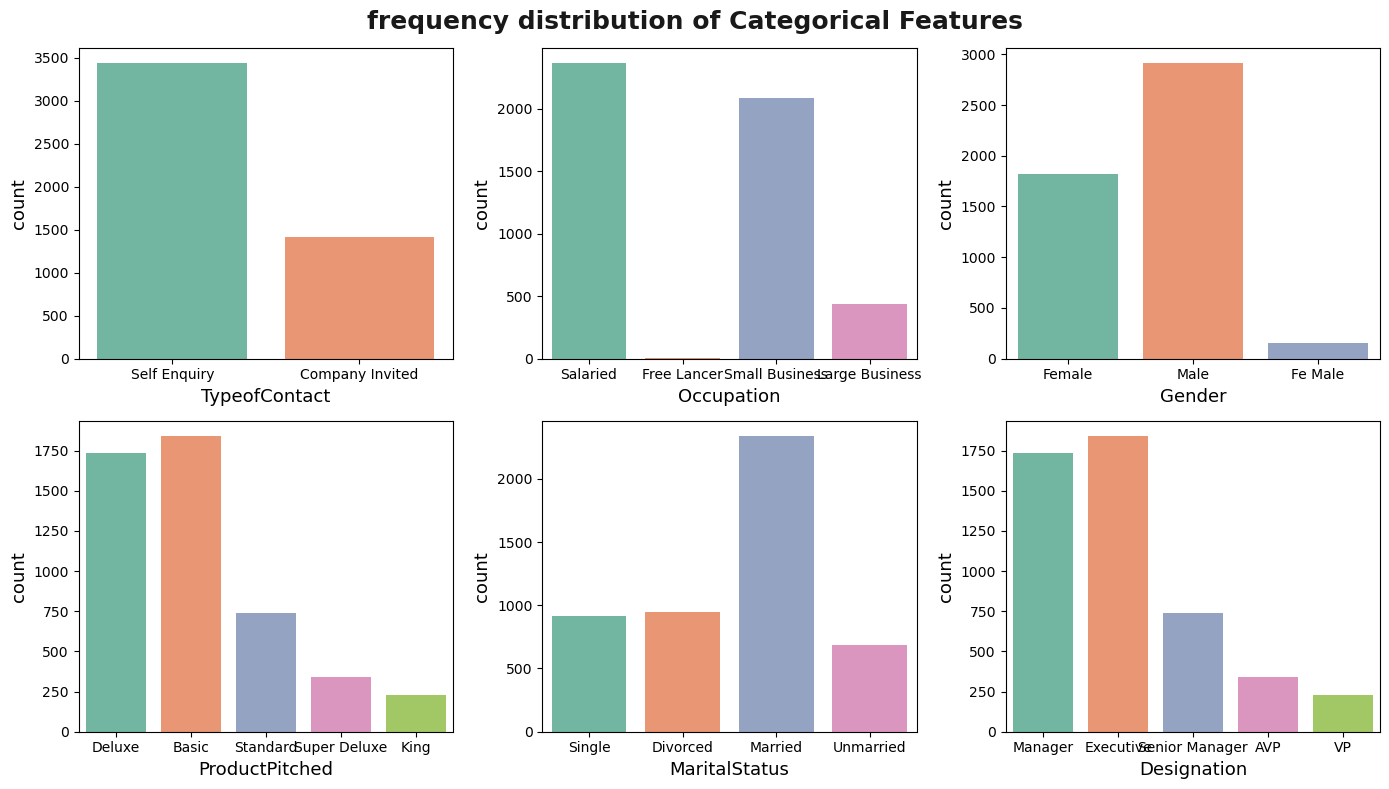

In [36]:
# categorical columns, Visualizing frequencies

plt.figure(figsize=(14, 8))
plt.suptitle('frequency distribution of Categorical Features', fontsize=18, fontweight='bold', alpha=0.9)

for idx in range(len(categorical_features)): #using idx to make it unique
    plt.subplot(2, 3, idx+1) #creating 2,3 grid
    sns.countplot(x=travel_data[categorical_features[idx]], palette='Set2')
    plt.xlabel(categorical_features[idx], fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.tight_layout()

In [38]:
# Checking correlation matrix excluding customer id as it does not make sense
correlation_matrix=travel_data[(numerical_features[1:])].corr()
# Display the Matrix
print('Correlaction matrix for selected numerical features:\n',correlation_matrix)


Correlaction matrix for selected numerical features:
                           ProdTaken       Age  CityTier  DurationOfPitch  \
ProdTaken                  1.000000 -0.147254  0.086852         0.078257   
Age                       -0.147254  1.000000 -0.015625        -0.012063   
CityTier                   0.086852 -0.015625  1.000000         0.022703   
DurationOfPitch            0.078257 -0.012063  0.022703         1.000000   
NumberOfPersonVisiting     0.009627  0.011621 -0.001671         0.065141   
NumberOfFollowups          0.112171 -0.002577  0.023652         0.009434   
PreferredPropertyStar      0.099577 -0.010474 -0.009164        -0.006637   
NumberOfTrips              0.018898  0.184905 -0.029709         0.009715   
Passport                   0.260844  0.033399  0.001793         0.033034   
PitchSatisfactionScore     0.051394  0.018510 -0.042160        -0.002880   
OwnCar                    -0.011508  0.048654  0.003817        -0.001626   
NumberOfChildrenVisiting   0.00742

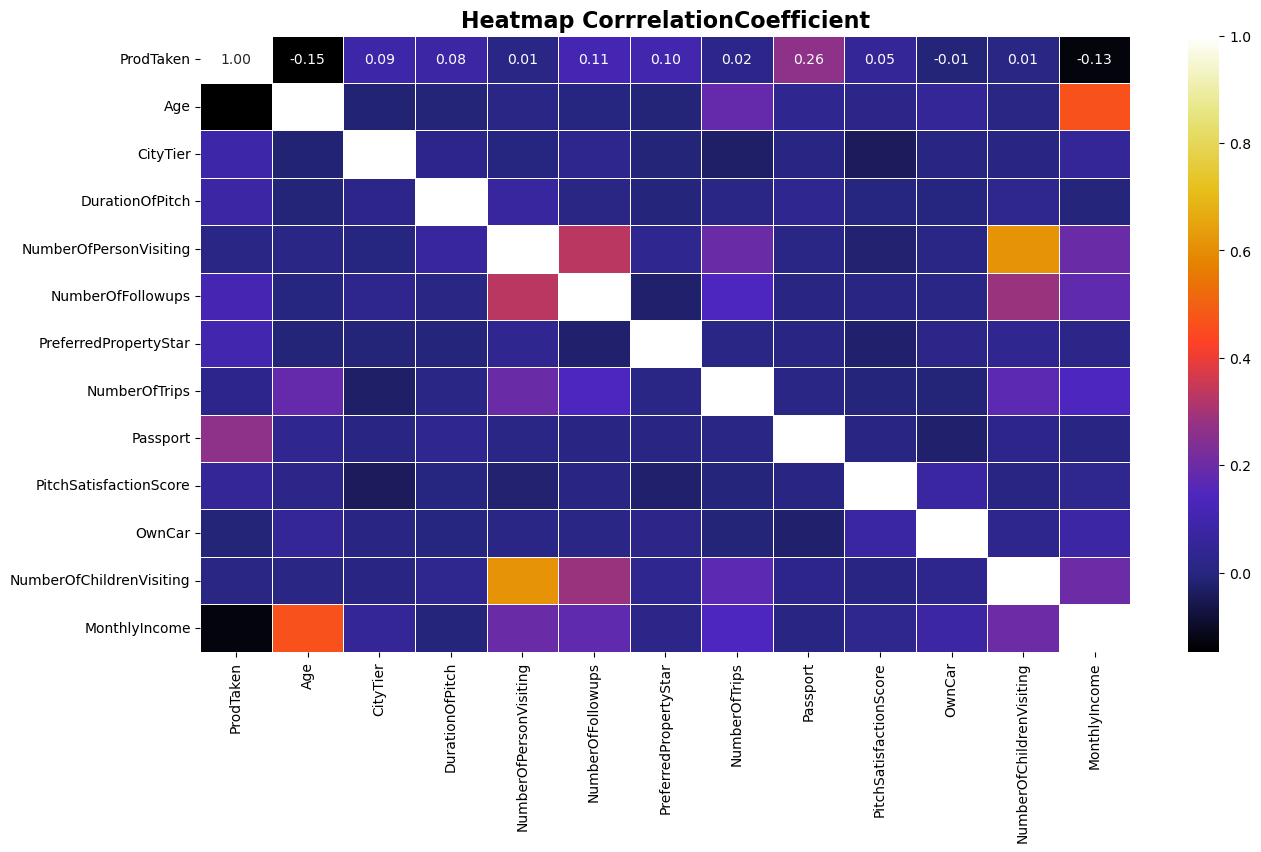

In [40]:
# Heatmap to visualize the correlation
plt.figure(figsize = (15, 8))
#generate heatmap with annotation
sns.heatmap(travel_data[(numerical_features[1:])].corr(), cmap="CMRmap", annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap CorrrelationCoefficient',fontsize=16, fontweight='bold')
plt.show()

### Report

- **Target Column Correlations**:
  - **`ProdTaken`**: Shows a Slight inverse relationship between `Age` and `Monthly Income`.
  - **`NumberOfFollowups`** and **`Passport`**: Depicted mild positive relation with `ProdTaken`.
  - **`NumberOfPersonVisiting`** and **`NumberOfChildrenVisiting`**: Strongly positive correlated with each other.
  - **`Numberoftrips`** shows positive relation with `ProdTaken` and `MonthlyIncome`

## Checking for Null Values and Duplicates

In [42]:
# now will check missing data if any
null_counts= travel_data.isnull().sum().sort_values (ascending=False)
print('NullValues', null_counts)

#check for Duplicates,
travel_data.duplicated().any()


NullValues DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64


False

### Unique Value Analysis
- Retrieve the unique value present in dataset
- This will Examining data through UVA which can reveal patterns in the spread and variation of characteristics, enabling more informed choices regarding the management of absent data points.

In [52]:
travel_data['Age'].unique()

array([41., 49., 37., 33., nan, 32., 59., 30., 38., 36., 35., 31., 34.,
       28., 29., 22., 53., 21., 42., 44., 46., 39., 24., 43., 50., 27.,
       26., 48., 55., 45., 56., 23., 51., 40., 54., 58., 20., 25., 19.,
       57., 52., 47., 18., 60., 61.])

In [54]:
travel_data['Passport'].unique()

array([1, 0], dtype=int64)

In [50]:
continuous_features=[feature for feature in numerical_features if len(travel_data[feature].unique())>=10]
print('Number of continuous features are :',continuous_features)

Number of continuous features are : ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


### **Subplot Visualization for Continuous Feature distribution**

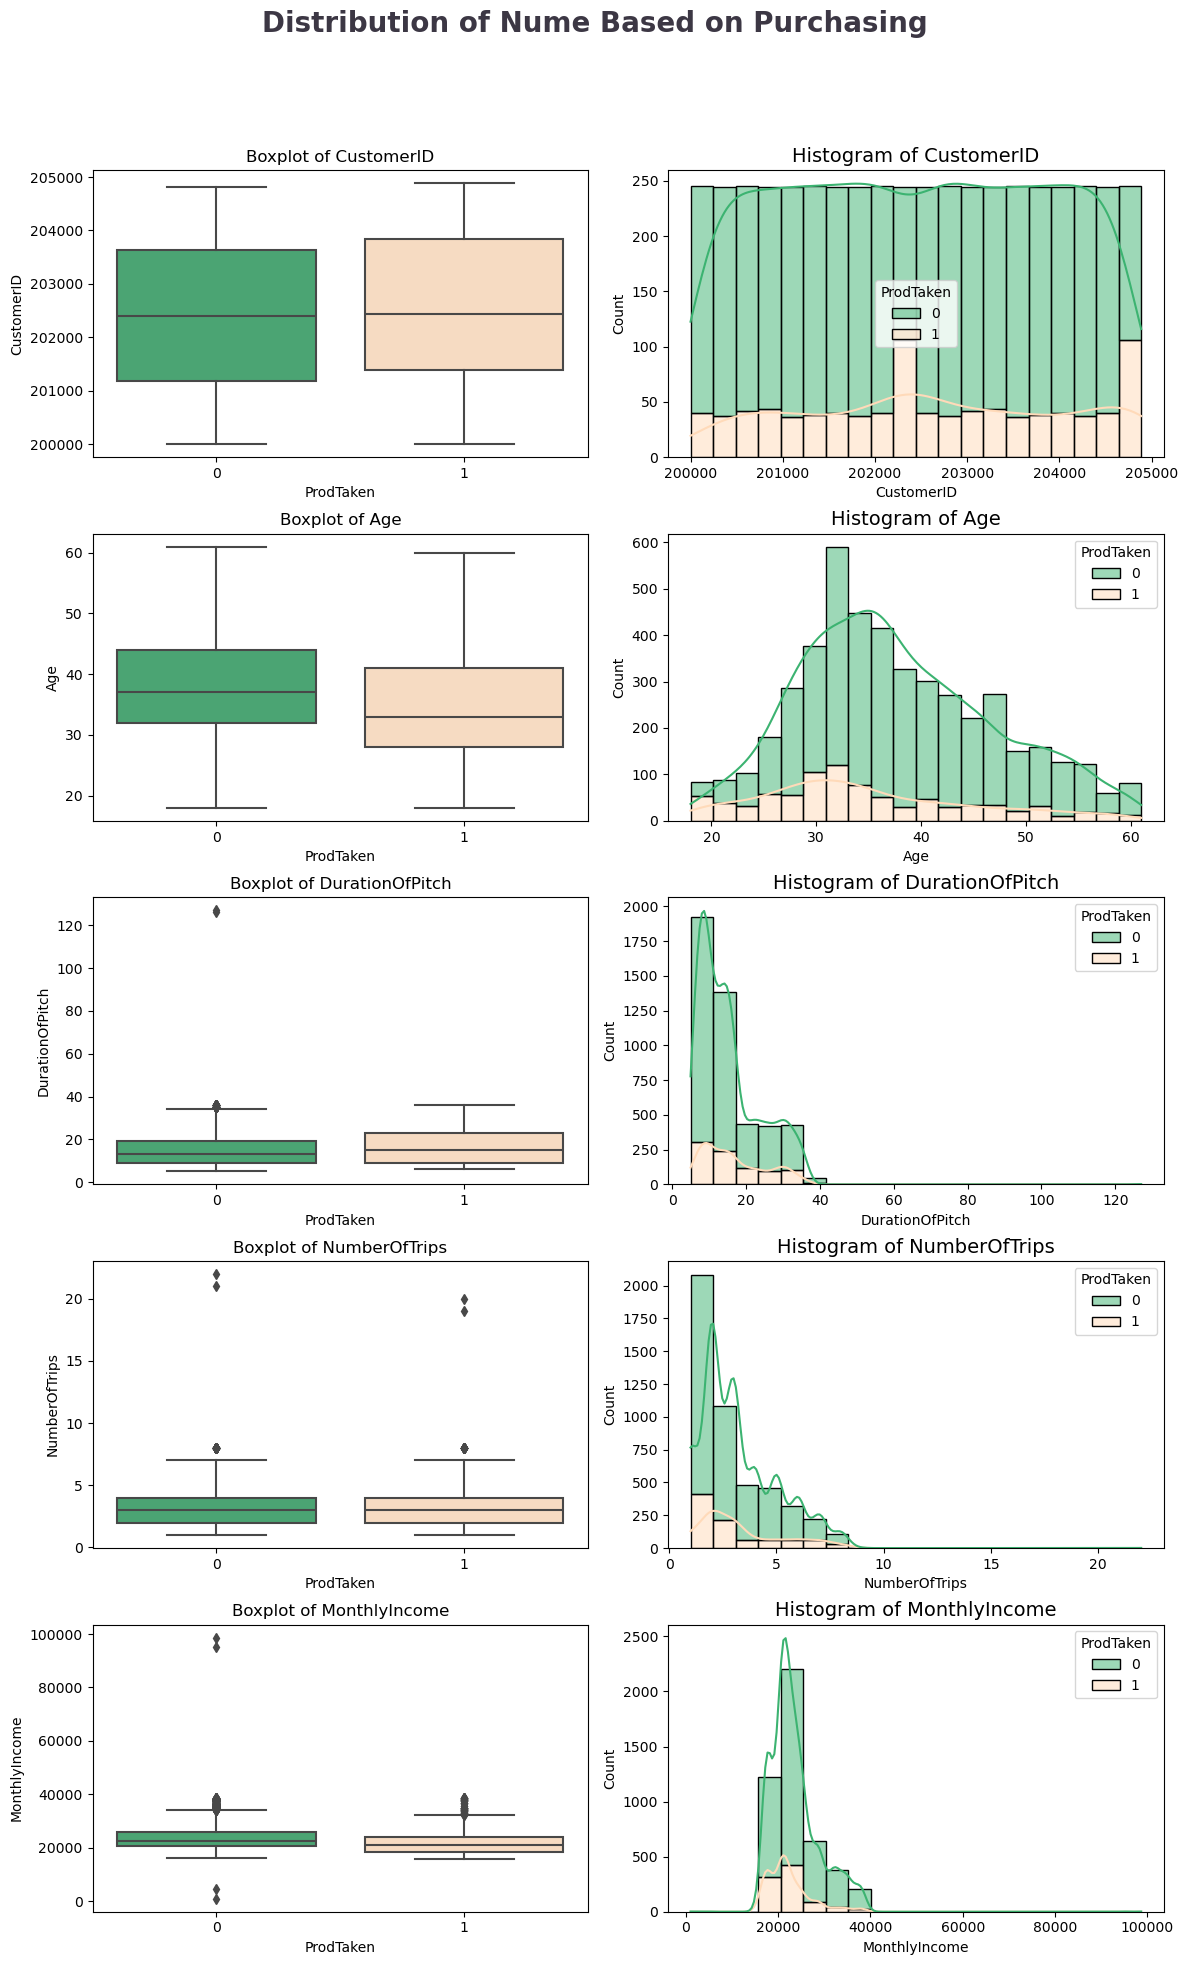

In [56]:
# defining color palette for visualization
color_palette = ['#3CB371', '#FFDAB9']

# Figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(12,20))
fig.suptitle('Distribution of Nume Based on Purchasing', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

#loopinf feature to create boxplots and Histogram
for idx, col in enumerate(continuous_features):   
    sns.boxplot(data=travel_data, x='ProdTaken', y=col,  palette=color_palette, ax=axes[idx,0])
    axes[idx,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=travel_data, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=color_palette, ax=axes[idx,1])
    axes[idx,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=.90)

- The figure shows 10 subplots (5 rows, 2 columns), with each row displaying a boxplot and a histogram for a particular numerical feature.
- The boxplots compare the distributions of each numerical feature for customers who took the product vs. those who did not.
- The histograms display the distribution of each feature with the stacked bars showing the ProdTaken categories.
- In the CustomerID column has unique value for each row, it can be ignored as a feature.
- 
Customers with monthly incomes ranging from 15000-25000 are more likely buying travel packages
- 
Pitch duration that sales team do under 20 minutes made more sales

### Initial Analysis Report
- There are missing values in the Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, - NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact columns.- The CustomerID column can be deleted because each row has unique values.
- The Prodtaken isthe target value.

### **Imputing Null values**

- **Impute Median value for Age column**
- **Impute Mode for Type of Contract**
- **Impute Median for Duration of Pitch**
- **Impute Mode for NumberofFollowup as it is Discretefeature**
- **Impute Mode for PreferredPropertyStar**
- **Impute Median for NumberofTrips**
- **Impute Mode for NumberOfChildrenVisiting**
- **Impute Median for MonthlyIncome**

In [58]:
#Age with median
travel_data['Age'].fillna(travel_data['Age'].median(), inplace=True)

#TypeofContract with mode
travel_data['TypeofContact'].fillna(travel_data['TypeofContact'].mode()[0], inplace=True)

#DurationOfPitch with median
travel_data['DurationOfPitch'].fillna(travel_data['DurationOfPitch'].median(), inplace=True)

#Imputing missing value with mode
travel_data['NumberOfFollowups'].fillna(travel_data['NumberOfFollowups'].mode()[0], inplace=True)

#PreferredPropertyStar with mode
travel_data['PreferredPropertyStar'].fillna(travel_data['PreferredPropertyStar'].mode()[0], inplace=True)

#NumberOfTrips 
travel_data['NumberOfTrips'].fillna(0, inplace=True)

#NumberOfChildrenVisiting with mode
travel_data['NumberOfChildrenVisiting'].fillna(travel_data['NumberOfChildrenVisiting'].mode()[0], inplace=True)

#MonthlyIncome
travel_data.MonthlyIncome.fillna(travel_data.MonthlyIncome.median(), inplace=True)

### Visualization

In [60]:
#travel_data.copy(): Creating a copy of the original travel data and assigns it to df1 to avoid any changes in real data 
# ProdTaken converting in binary values

df1 = travel_data.copy()
df1['ProdTaken'] = np.where((travel_data.ProdTaken == 1),'Purchased', 'Not-Purchased' )
df1.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,Purchased,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,Not-Purchased,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,Purchased,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


- **Q1:- How can we identify and address the key factors influencing the low purchase rate among customers, and what strategies can be implemented to convert the non-purchasing customers into buyers, thereby improving overall sales and enhancing marketing effectiveness?**

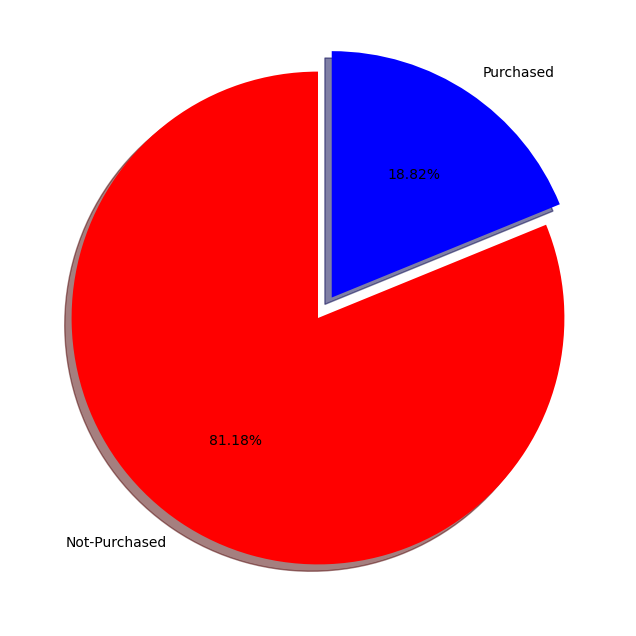

In [62]:
percentage = df1.ProdTaken.value_counts(normalize=True)*100
labels = ["Not-Purchased","Purchased"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['red', 'blue']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

### Pie Chart Analysis

The pie chart illustrates the distribution of customer responses regarding the product purchase:

- **Purchased**: 18.82% of customers made a purchase.
- **Not-Purchased**: 81.18% of customers did not make a purchase.

This distribution indicates that a significant majority of customers chose not to purchase the product, with only a small fraction completing the purchase. This insight can guide marketing strategies, targeting efforts, and further analysis to understand and potentially address the factors influencing customer purchase behavior.

- **Q2: Which gender is more likely to purchase the product, and how does this information impact targeted marketing strategies?**

In [64]:
# count the occurences of gender within purchased group
df1[df1.ProdTaken == 'Purchased'].Gender.value_counts(normalize=True)

Gender
Male       0.628261
Female     0.344565
Fe Male    0.027174
Name: proportion, dtype: float64

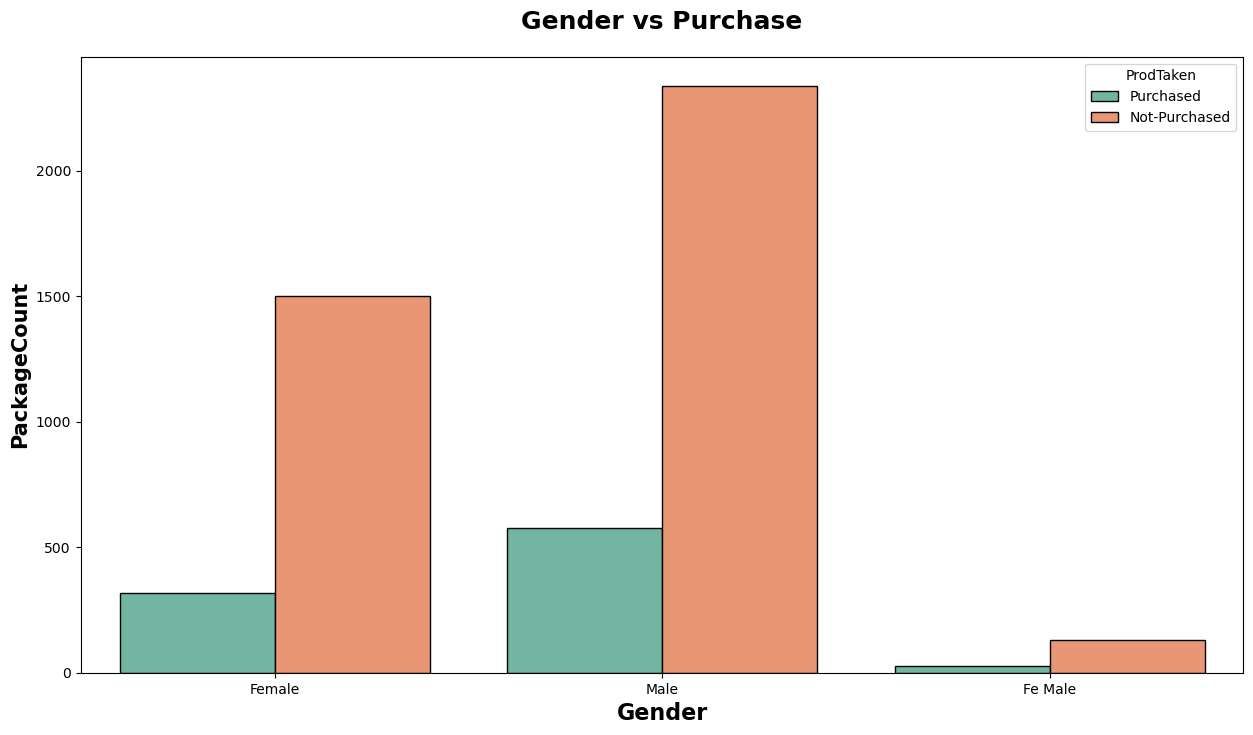

In [66]:
plt.subplots(figsize=(15,8))
#create a countplot to visualize the relationship
sns.countplot(x="Gender",hue="ProdTaken", data=df1,ec = "black",palette="Set2")
#Set the Title and Label
plt.title("Gender vs Purchase", weight="bold",fontsize=18, pad=20)
plt.ylabel("PackageCount", weight="bold", fontsize=15)
plt.xlabel("Gender", weight="bold", fontsize=16)

#display
plt.show()

**Report:**

As per the Chart **Male customers** Purchased more than **Female customers**.
**37% Female customers** and **63% Male customers**.
This Feature has **impact on the Target Variable**.


### AGE Category Split 
**Q3** - **How does the age category influence customer purchasing behavior, and which age group should be targeted to maximize the uptake of our product offerings?**

In [68]:
# Defining age bins and labels for grouping
bins= [10,20,50,70]
labels = ['Teens','Adult','Senior']
# create a new column "Age group"
df1['AgeGroup'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)
age_group = df1.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomer')
#display the grouped data
age_group

,AgeGroup,ProdTaken,TotalCustomer
0,Teens,Not-Purchased,17
1,Teens,Purchased,29
2,Adult,Not-Purchased,3417
3,Adult,Purchased,790
4,Senior,Not-Purchased,534
5,Senior,Purchased,101


In [131]:
# Check the data types
print(df1['AgeGroup'].dtype)
print(df1['ProdTaken'].dtype)

category
object


In [126]:
#Type
df1['ProdTaken'] = df1['ProdTaken'].astype(str)

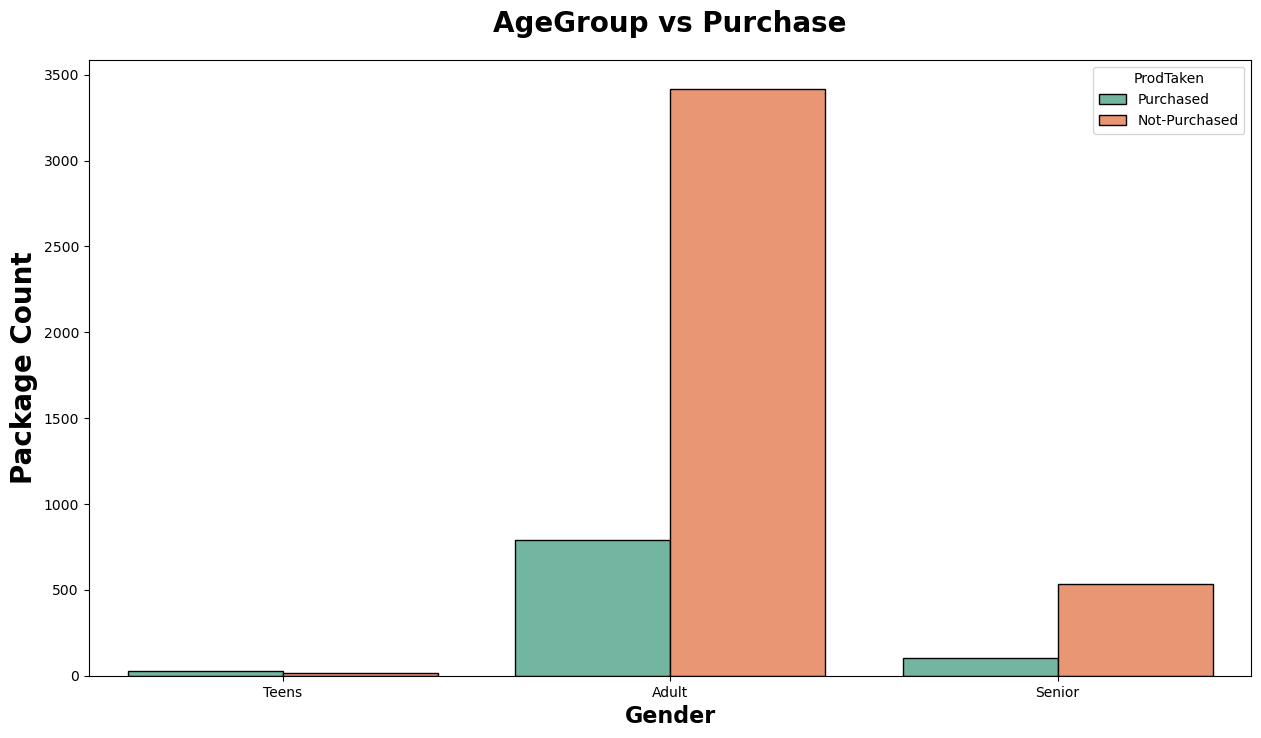

In [70]:
#Plotting graph to visualize

plt.subplots(figsize=(15,8))
sns.countplot(x="AgeGroup",hue="ProdTaken", data=df1,ec = "black",palette="Set2")

# Title and labeling
plt.title("AgeGroup vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)

# displaying graph
plt.show()

### Report:

**As per the Chart Adult age Group has the most share of purchase.**
The **AgeGroup** is 20-50 years old.


### Duration Of Pitch vs Product Purchase

**Q4** **How does the duration of the sales pitch affect product purchases, and can adjusting it increase sales?**

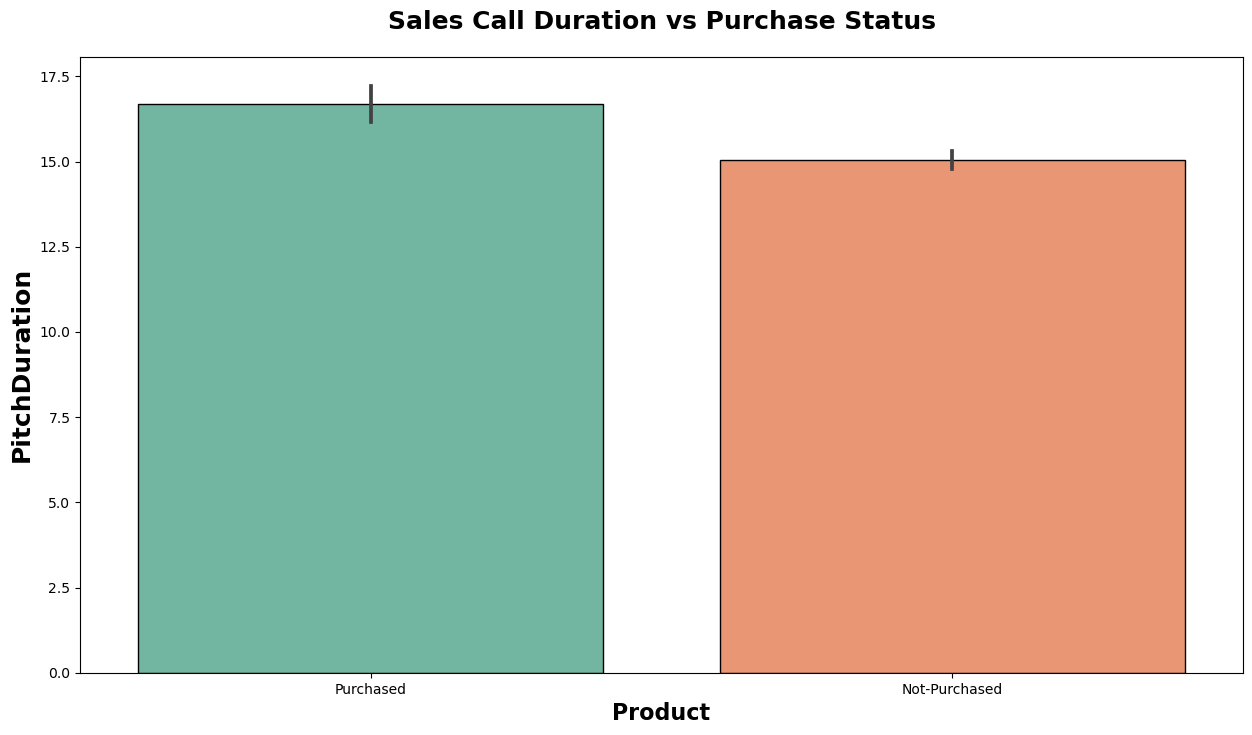

In [72]:
# Plotting Subplots
plt.subplots(figsize=(15,8))
sns.barplot(x="ProdTaken", y='DurationOfPitch', data=df1,ec = "black",palette="Set2")

# Title and Labeling
plt.title("Sales Call Duration vs Purchase Status", weight="bold",fontsize=18, pad=20)
plt.ylabel("PitchDuration", weight="bold", fontsize=18)
plt.xlabel("Product", weight="bold", fontsize=16)

# Display the graph
plt.show()

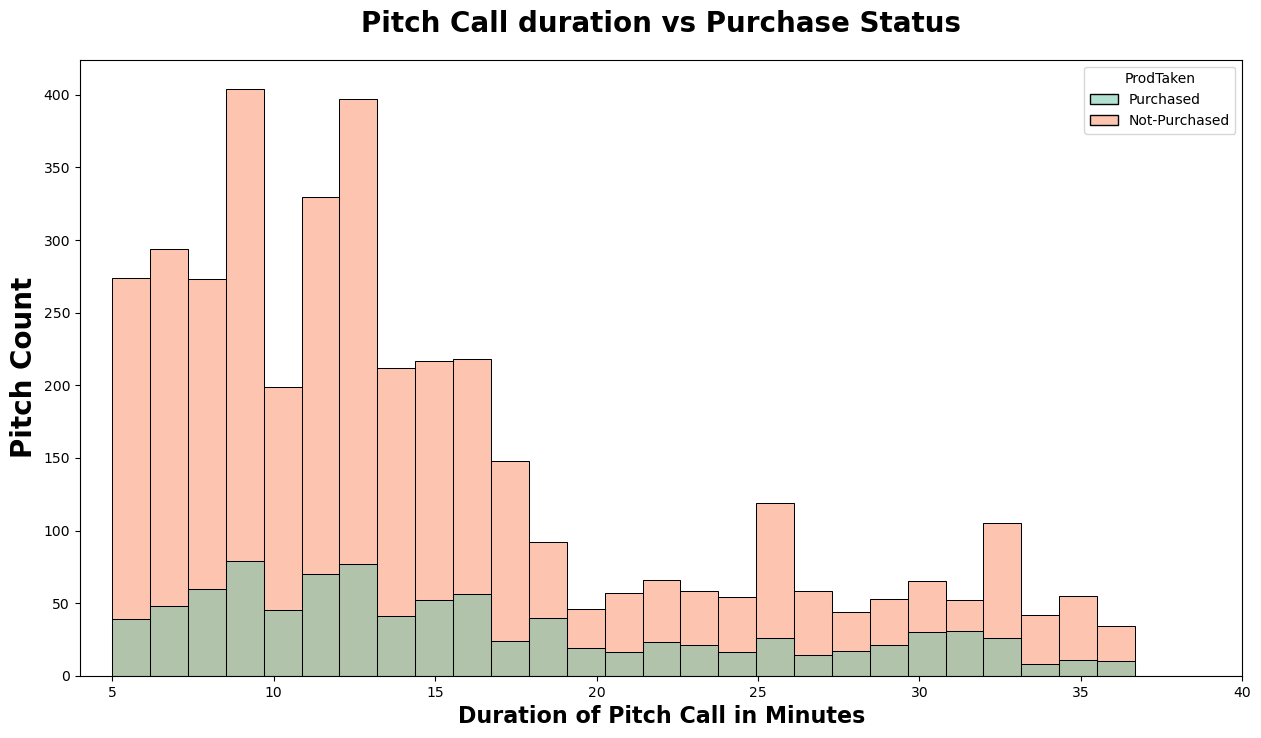

In [139]:
# Set the figure size
plt.subplots(figsize=(15,8))
# creating histogram
sns.histplot(x="DurationOfPitch", data=df1,palette="Set2", hue="ProdTaken")
#adding Title and labels
plt.title("Pitch Call duration vs Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Pitch Count", weight="bold", fontsize=20)
plt.xlabel("Duration of Pitch Call in Minutes", weight="bold", fontsize=16)

# Setting x-axis limit to focus on specific range of pitch
plt.xlim(4,40)
# display
plt.show()

## Visitor Count

**Q5** **What are the typical compositions of groups that make purchases (e.g., friends, family, colleagues)?**

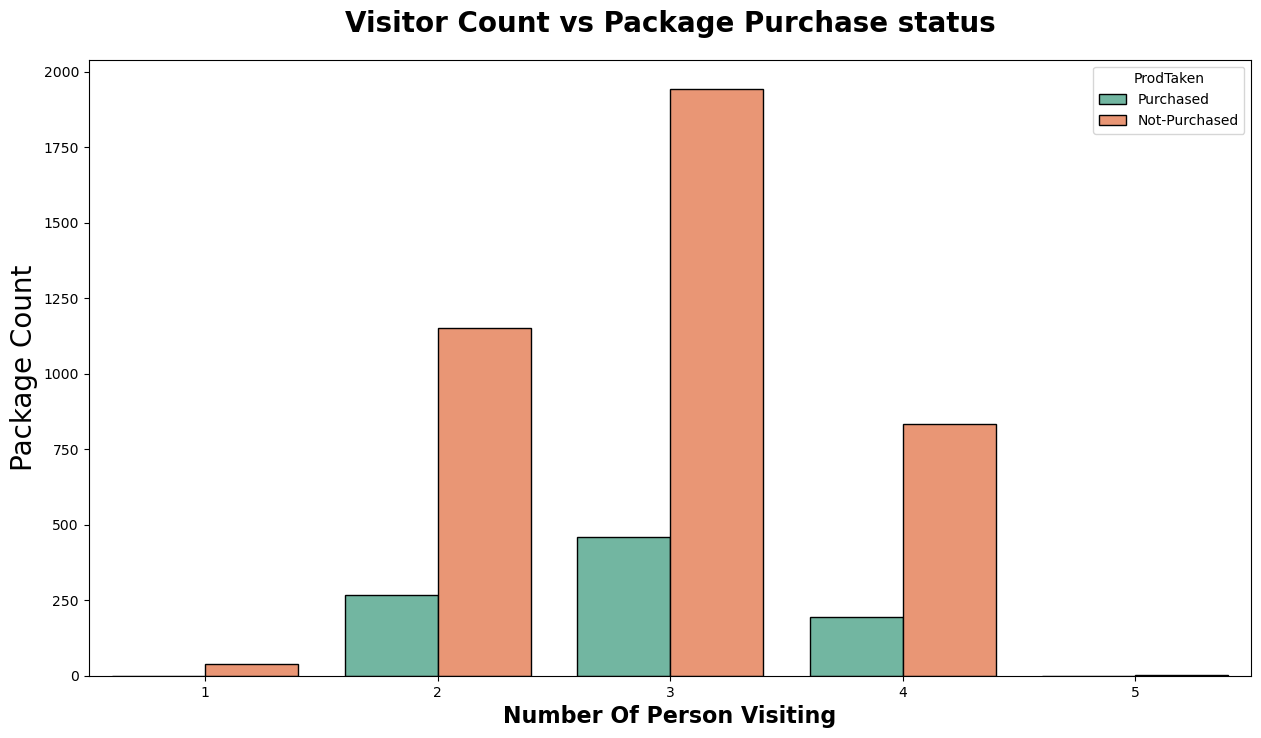

In [74]:
plt.subplots(figsize=(15,8))
sns.countplot(x="NumberOfPersonVisiting",hue="ProdTaken", data= df1,ec = "black",palette="Set2")
plt.title("Visitor Count vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", fontsize=20)
plt.xlabel("Number Of Person Visiting", weight="bold", fontsize=16)
plt.show()

**Report**

- As per the Chart **Most Purchase** were from **3 People**. That might be 3 Unmarried Friends or a Family with Couple and a Child.
- Followed by 2 Number of Person.

## Product Pitched and Product's Status

**Q6** **What is the conversion rate of packages that were pitched versus those that were purchased?**

In [76]:
## Create df2 which is data of who have purchased
df2 = df1[df1['ProdTaken']== 'Purchased']

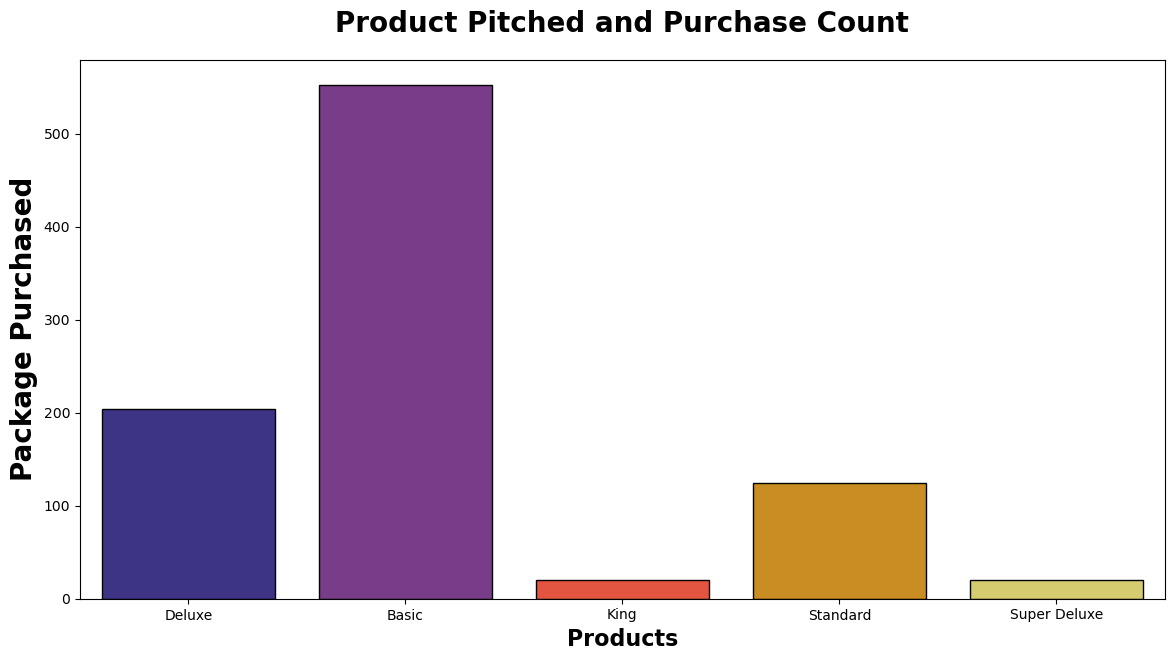

In [78]:

plt.subplots(figsize=(14,7))
sns.countplot(x="ProductPitched", data= df2,ec = "black",palette="CMRmap")
plt.title("Product Pitched and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

**Report**

- **Basic Package** was the most preferred package by customers
- **Deluxe** is Second more Purchased Package

**Recommendation**
- Create special promotions or discounts for groups of 2 and 3. For instance, offer a discount on larger purchases or bundle deals that encourage group shopping.
- Design a shopping experience that caters to the needs of groups. This might include features like group checkouts, shared wish lists, or recommendations for group activities

### Products Pitched and Not Purchased

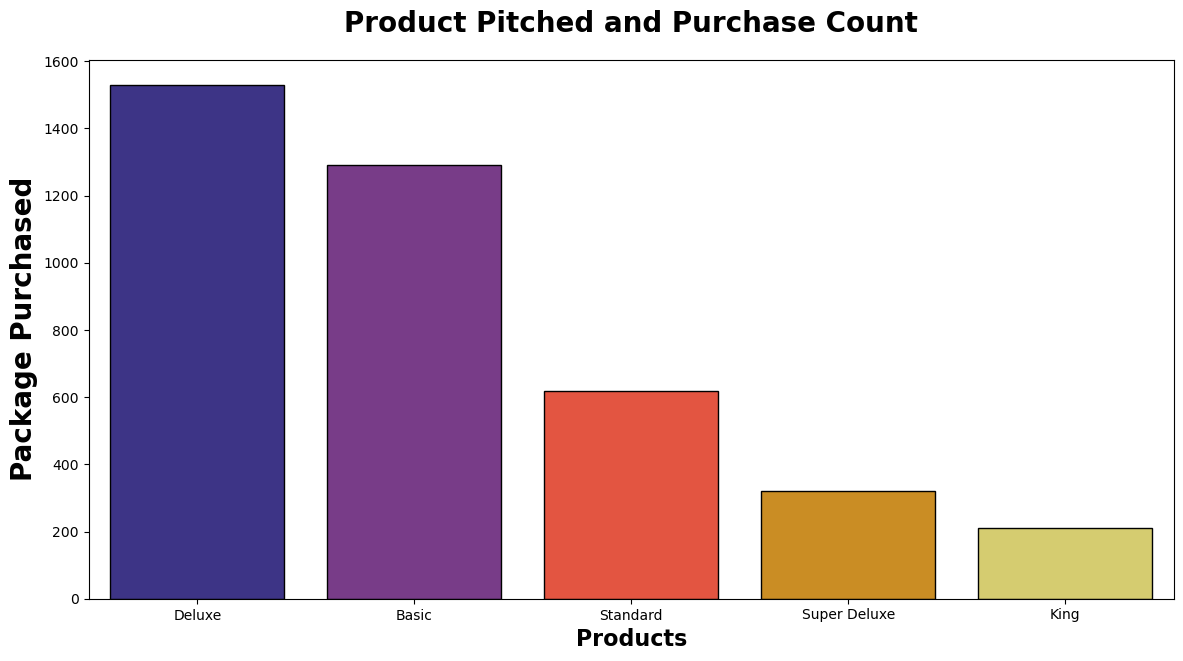

In [80]:
df3 = df1[df1['ProdTaken']=='Not-Purchased']
plt.subplots(figsize=(14,7))
sns.countplot(x="ProductPitched", data= df3,ec = "black",palette="CMRmap")
plt.title("Product Pitched and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

**Report**

- **Deluxe Package** was the most Pitched package by Sales Yet People didnt buy it.
- **Reducing the cost of Deluxe Package** might help in getting sucessfull sales pitch.

## Preferred Property Star vs Product Purchase

**Q7** **How does the preference for 3 rating Accomodation over 5-star and 4 rating accomodation impact the package purchase rates across different property star ratings?**

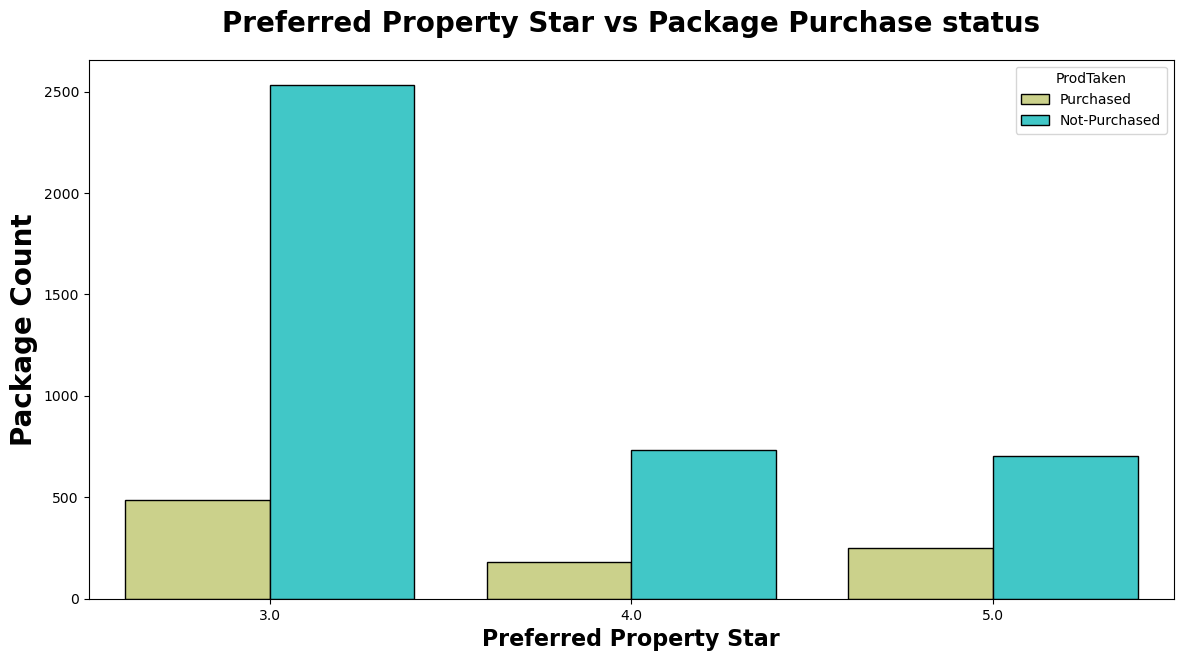

In [85]:
plt.subplots(figsize=(14,7))
sns.countplot(x="PreferredPropertyStar",hue="ProdTaken", data= df1,ec = "black",palette="rainbow_r")
plt.title("Preferred Property Star vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Preferred Property Star", weight="bold", fontsize=16)
plt.show()

**Report**
- People Perfered More **3 Star Accomodation** Followed by **5 Stars** and **4 Stars**

**Recommendations**
- Implement promotions or discounts for 3-star hotels to increase bookings during off-peak times.
- Consider adding value-added services (e.g., free Wi-Fi, breakfast) to all hotel star categories to enhance the overall guest experience and satisfaction.
- Continuously monitor guest preferences and industry trends to stay updated on shifts in hotel rating preferences and adjust strategies accordingly

## 1.Objectives for Data Analysis
- **Segment Customers for Targeted Marketing:** 
- **Determine Effective Marketing Channels:** 
- **Identify Key Drivers of Package Purchases:**
- **Analyze Purchasing Behavior Trends:** 
- **Predict Potential Buyers for New Packages:** 
- **Optimize Marketing Budget Allocation:** 

## 2. Key Business Questions and Insights
- **1. Low Purchase Rate and Customer conversion** 18.82% of customer made purchase while 81.18% did not, This highlights a significant gap in customer interest and actual Cpnversion
- **Actionalble Insights** Enhance targeted marketing efforts towards non purchasing customer by identifying the barriers to their purchase decision.
- **2. Gender Based Purchasing behaviour**  Male Customer(63) purchased more than female(37) customer.
- **Actionable Indisghts** Craft gender based marketing campaigns
- **3. Age Category Influence** The Adult age group (20-50 years old) has the highest share of purchases.
- **Actionable Insights** Focus marketing efforts on the Adult segment, as they represent the core customer base.
- **4. Impact of Sales pitch Duration** Customers respond to well-crafted, concise pitches, but further analysis is needed to determine the optimal duration for conversion.
- **Actionable Insights** Experiment with shorter, direct pitches versus longer, detailed presentations, and analyze the results

## Report Summary:
- **Purchase Rate:** Only 18.82% of customers made a purchase, suggesting the need for more aggressive marketing and incentive strategies.
- **Gender-Based Insights:** Male customers are more likely to purchase, which can inform future marketing efforts.
- **Age Group Targeting:** The 20-50 age group is the most responsive demographic, offering a key segment to target with specific holiday packages.
- **Group Preferences:** Groups of 2-3 people are more likely to purchase, making them ideal for promotions and packages.
- **Hotel Preferences:** The majority of customers preferred 3-star hotels, which offers an opportunity to market budget-friendly yet comfortable accommodation.

## Recommendations:
- **Target Promotions for Groups:** Offer discounts for groups of 2 and 3 people, as they are more likely to purchase.
- **Create Gender-Specific Campaigns:** Focus on male customers while developing strategies to engage more female customers.
- **Enhance 3-Star Hotel Offers:** Provide additional amenities or promotions to maintain and grow the preference for 3-star hotels.
- **Engage Non-Purchasing Customers:** Use tailored email campaigns and discounts to encourage undecided customers to complete their purchases.
- **Budget Allocation:** Focus marketing budgets on the Adult demographic and on channels that engage male customers more effectively.

  
                     